In [1]:
import glob
import numpy as np
import plotly as py
import cufflinks as cf
import pandas as pd
%matplotlib inline

In [2]:
path_to_eval_logs = "../eval/20190324_RetinaNet_train_A_over_ganaug_050_eval/train_A_over_ganaug_050_2000"
plot_title = "Train-A-Over-GANaug-050 @ Train-A-Over-GANaug-050-2000"

In [3]:
logs = glob.glob(path_to_eval_logs + "/**/*.txt", recursive = True)

In [4]:
df_iterations = pd.DataFrame()
last_iteration = -1
for log in logs:
    df = pd.read_csv(log)
    df = df.drop(columns = ["Unnamed: 12"])
    df["Iteration"] = last_iteration if log.split("_model_")[-1].split("_")[0] == "final" else int(log.split("_model_")[-1].split("_")[0])
    df_iterations = pd.concat([df_iterations, df], axis = 0)
    df_iterations = df_iterations.reset_index(drop = True)
    last_iteration = df["Iteration"]
df_iterations = df_iterations.sort_values(by = ['Iteration']).reset_index(drop = True)

In [5]:
df_iterations.head(3)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl,Iteration
0,0.152160,0.337726,0.122313,0.050281,0.281937,0.387748,0.062715,0.205422,0.236378,0.121402,0.410851,0.476240,2500
1,0.185211,0.391660,0.158848,0.071006,0.340764,0.463908,0.072208,0.236224,0.267429,0.144768,0.460391,0.554325,5000
2,0.201528,0.423983,0.171709,0.080414,0.367711,0.468044,0.076319,0.256743,0.291394,0.167242,0.474147,0.534633,7500


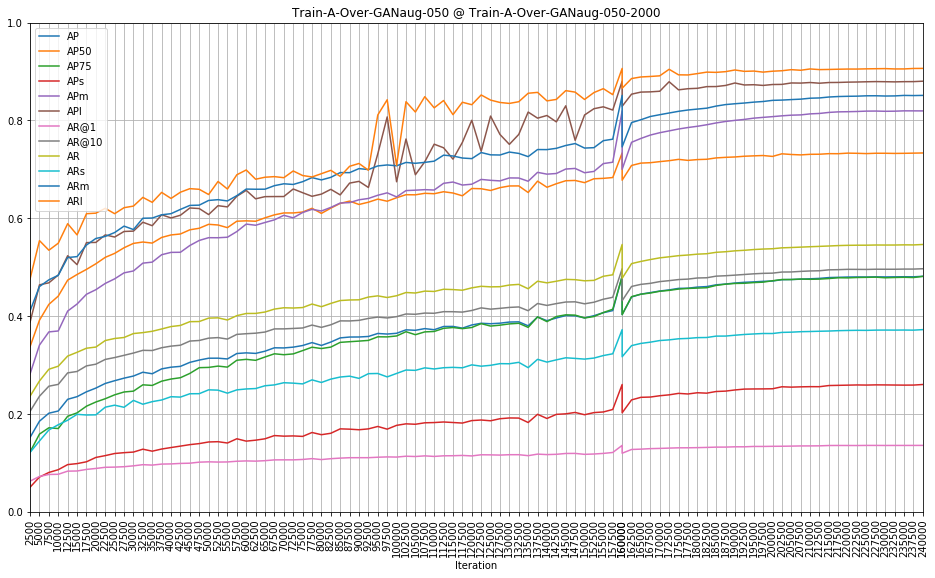

In [6]:
df_iterations.plot(x = 'Iteration', y = ["AP", "AP50", "AP75", "APs", "APm", "APl", "AR@1", "AR@10", "AR", "ARs", "ARm", "ARl"], xticks = df_iterations["Iteration"], rot = 90, ylim = (0, 1), title = plot_title, grid = True, figsize = (16, 9))

In [7]:
cf.go_offline(connected = True)
config = {
    "modeBarButtonsToRemove": ["sendDataToCloud"],
    "displaylogo": False
}
layout = {
    "title": plot_title,
    "xaxis": {
        "title": "Iteration",
        "tickvals": df_iterations["Iteration"],
    },    
    "yaxis": {
        "title": "Score"
    },
    "width": 960,
    "height": 540
}
fig = df_iterations.iplot(x = 'Iteration', y = ["AP", "AP50", "AP75", "APs", "APm", "APl", "AR@1", "AR@10", "AR", "ARs", "ARm", "ARl"], layout = layout, asFigure = True)
py.offline.iplot(fig, show_link = False, config = config)